# BREAST CANCER PREDICTION PROJECT

## INTRODUCTION

Breast cancer is one of the most common cancers affecting women worldwide. Early and accurate diagnosis is crucial for effective treatment and improving patient outcomes. in this project i aim to develop a machine model to predict whether a breast tumor is a malignant or benign based on patient derived from digitized images of breast tissue. Using this dataset i will explore various features.

This project will follow **CRISP-DM** methodology:
1. **Business Understanding**
2. **Data Understanding**
3. **Data Preparation**
4. **Modeling**
5. **Evaluation**

## Business Understanding

**Problem statement**

Breast cancer poses a significant health risk to women globally, with early detection being crucial for effective treatment and survival. Therefore i want to develop a reliable and accurate tool that can assist health care providers in identifying malignant(cancerous) tumors from benign(non-cancerous) ones using patient data

**project objectives**

1. Develop a predictive model
2. Improve diagnostic accuracy
3. Ensure the model's prediction are interpretable

## Data Understanding

**Dataset Name**: Breast Cancer Wisconsin (Diagnostic) Data Set

### Features

**ID**: Unique identifier

**Diagnosis**: The target variable

**30 Numeric Features**: predictors

In [57]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# loading the dataset
df = pd.read_csv('data.csv')
# display the datafram
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# checking the dimensions of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 569 rows and 33 columns


In [4]:
# summary statistics of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# checking for missing values
missing_value = df.isnull().sum()
missing_values = missing_value[missing_value > 0]
print(f"""
Rows with Missing values in the dataset:
{missing_values}
""")


Rows with Missing values in the dataset:
Unnamed: 32    569
dtype: int64



In [7]:
# exploring the distribution of the target variable
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Distribution of Tumor Diagnosis**

The bar chart below shows the distribution of the target variable, 'diagnosis', which indicates whether a tumor is Benign(B) or malignant(M).

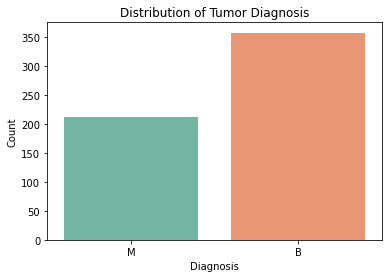

In [8]:
# visualizing the target variable
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Tumor Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

## Data Preparation

Preparing data for modelling by:
1. **Data cleaning**
2. **Feature selection**
3. **Feature scaling**
4. **Splitting the data**

**Data Cleaning**

In [9]:
# dropping the column with missing values
df = df.drop('Unnamed: 32', axis=1)

In [10]:
# rechecking for missing values
missing_val = df.isnull().sum()
if missing_val.sum() > 0:
    print("There are missing values")
else:
    print("There are no missing values")

There are no missing values


In [11]:
# removing the ID column since it is not useful for modelling
df = df.drop(columns=['id'])

In [12]:
# converting the diagnosis column to a numerical format
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

In [13]:
# saving the clean data to a new csv file
df.to_csv('cleaned_data.csv', index=False)

**Feature Selection**

In [14]:
# selecting the target and the feature variables
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

**Feature Scaling**

In [15]:
# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Splitting the Data**

In [16]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)
# display train and test sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 426
Testing set size: 143


## Modeling

1. **Train a Basic Logistic Regression Model**

In [17]:
# instatiating the model
lr = LogisticRegression(random_state=42)

In [18]:
# Train the model
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
# making predictions
y_pred_lr = lr.predict(X_test)

In [20]:
# Evaluating the model
print("Logistic Regression - Confusion MatriX: \n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression - Classification Report: \n", classification_report(y_test, y_pred_lr))

Logistic Regression - Confusion MatriX: 
 [[87  2]
 [ 1 53]]
Logistic Regression - Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



2. **Explore nonparametric models**

* **Decision Trees Model**

In [21]:
# instatiating the model
dt = DecisionTreeClassifier(random_state=42)

In [22]:
# training the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# making predictions
y_pred_dt = dt.predict(X_test)

In [24]:
# Evaluate the model
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nDecision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree - Confusion Matrix:
 [[85  4]
 [ 3 51]]

Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



* **Random Forest Model**

In [25]:
# instatiating the model
rf = RandomForestClassifier(random_state=42)

In [26]:
# training the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# making predictions
y_pred_rf = rf.predict(X_test)

In [28]:
# evaluating the model
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest - Confusion Matrix:
 [[87  2]
 [ 3 51]]

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



* **Gradient Boosting**

In [29]:
# instatiating the model 
gb = GradientBoostingClassifier(random_state=42)

In [30]:
# training the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [31]:
# making predictions
y_pred_gb = gb.predict(X_test)

In [32]:
# evaluating the model
print("Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting - Confusion Matrix:
 [[86  3]
 [ 3 51]]

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### Evaluation

I will compare the Logistic Regression, Decision Tree, Random Forest and  Gradient Boosting models using the following evaluation metrics:
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion Matrix

1. **Accuracy**

|**Models**|**Accuracy**|
|----------|-----|
|Logistics Regression|98%|
|Decision Tree|95%|
|Random Forest|97%|
|Gradient Boosting|96%|

Logistic Regression achieved the highest accuracy of 98%, indicating it correctly predicts the outcome most often compared to other models.

2. **Precision**

|**Models**|**Benign(0)**|**Malignant(1)**|
|----------|-----|-----|
|Logistics Regression|99%|96%|
|Decision Tree|97%|93%|
|Random Forest|97%|96%|
|Gradient Boosting|97%|94%|

Logistic Regression has the highest precision compared to other classes, especially for class 0 (Benign) with 99% precision, meaning it has the fewest false positives.

3. **Recall**

|**Models**|**Benign(0)**|**Malignant(1)**|
|----------|-----|-----|
|Logistics Regression|98%|98%|
|Decision Tree|96%|94%|
|Random Forest|98%|94%|
|Gradient Boosting|97%|94%|

Logistic Regression demonstrates better recall. Identifyies more true positives and having fewer false negatives.

4. **F1-Score**

|**Models**|**Benign(0)**|**Malignant(1)**|
|----------|-----|-----|
|Logistics Regression|98%|97%|
|Decision Tree|96%|94%|
|Random Forest|97%|95%|
|Gradient Boosting|97%|94%|

Logistic Regression has higher F1-Scores. This indicates a better balance between precision and recall

5. **Confusion Matrix**

* Logistic Regression

|                       | **Actual Positive** | **Actual Negative** |
|-----------------------|---------------------|---------------------|
| **Predicted Positive** |         87          |          2           |
| **Predicted Negative** |         1           |         53           |


* Decision Tree

|                       | **Actual Positive** | **Actual Negative** |
|-----------------------|---------------------|---------------------|
| **Predicted Positive** |         85          |          4           |
| **Predicted Negative** |         3           |         51           |


* Random Forest

|                       | **Actual Positive** | **Actual Negative** |
|-----------------------|---------------------|---------------------|
| **Predicted Positive** |         87          |          2           |
| **Predicted Negative** |         3           |         51           |


* Gradient Boosting

|                       | **Actual Positive** | **Actual Negative** |
|-----------------------|---------------------|---------------------|
| **Predicted Positive** |         86          |          3           |
| **Predicted Negative** |         3           |         51           |


**True Positives and True Negatives:** Logistic regression correctly identifies more true positives and true negatives compared to other models.

**False Positives and False Negatives:** Logistic regression has fewer false positives and false negatives compared to other models.

The objective of this project was to develop a predictuve model to classify breast tumors as eithe benign or malignant using machine learning techniques. 

After comparing multiple models, including:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting

**Logistic Regression** emerged as the most effective model.

## Feature Engeneering

**Polynomial Features**

In [42]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

 - I used `PolynomialFeatures` with a degree of 2 to create new features. 

In [43]:
# Feature scaling
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

- I applied standard scaling using `StandardScaler` to ensure that all features have a mean of 0 and a standard deviation of 1.

In [44]:
# Train logistic regression model with polynomial features
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train_poly, y_train)

LogisticRegression(max_iter=1000)

- After transforming the features, I trained a logistic regression model on the new polynomial features.
- I trained the model with `max_iter=1000` to ensure convergence given the increased complexity of the feature set.

In [45]:
# Predictions
y_pred = lg.predict(X_test_poly)

In [48]:
# Get the names of the original features
feature_names = X.columns
feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [50]:
# Get the names of the polynomial features
poly_feature_names = poly.get_feature_names(feature_names)
poly_feature_names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'radius_mean^2',
 'radius_mean texture_mean',
 'radius_mean perimeter_mean',
 'radius_mean area_mean',
 'radius_mean smoothness_mean',
 'radius_mean compactness_mean',
 'radius_mean concavity_mean',
 'radius_mean concave points_mean',
 'radius_mean symmetry_mean',
 'radius_mean fractal_dimension_mean',
 'radius_mean radius_se',
 'radius_mean texture_se',
 'radius_mean perimeter_se',
 'radius_mean area_se',
 'radius_mean 

In [53]:
# Create a DataFrame to view the polynomial features
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_train_poly_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concavity_worst^2,concavity_worst concave points_worst,concavity_worst symmetry_worst,concavity_worst fractal_dimension_worst,concave points_worst^2,concave points_worst symmetry_worst,concave points_worst fractal_dimension_worst,symmetry_worst^2,symmetry_worst fractal_dimension_worst,fractal_dimension_worst^2
0,-0.349138,-1.438513,-0.411726,-0.390479,-1.863662,-1.268607,-0.826171,-0.952866,-1.729368,-0.941541,...,-0.266291,-0.115618,0.163365,-0.013943,-0.086710,0.303120,0.271154,-0.028055,0.149402,-0.140301
1,-0.204687,0.312640,-0.133673,-0.275880,1.078073,0.863546,0.726314,0.898441,1.178770,1.474377,...,0.289607,0.712354,0.617511,0.843391,0.814184,0.823993,1.513268,0.087613,0.620103,0.652708
2,-0.329312,-0.215072,-0.317394,-0.364357,-1.579880,-0.457451,-0.597310,-0.764588,0.275343,-0.501024,...,-0.451745,-0.382430,-0.623173,-0.218198,-0.360449,-0.722851,-0.007471,-0.279345,-0.446760,-0.276561
3,1.027403,2.089824,1.046922,0.917584,0.316303,0.562037,1.048527,0.930437,-0.325697,-0.477474,...,1.599859,1.303627,-0.243286,0.033428,0.532242,-0.305200,-0.004446,-0.366290,-0.252451,-0.409972
4,1.828969,0.696001,1.763681,1.783821,-0.333674,0.628175,0.974660,1.265740,-0.131572,-1.713139,...,-0.443734,-0.152535,-0.402064,-1.077726,0.371391,-0.410605,-2.039061,-0.371198,-0.286137,0.517341


In [54]:
# Coefficients of the logistic regression model
coefficients = lg.coef_[0]

In [55]:
# Combine feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': coefficients
})

In [58]:
# Sort by absolute value of the coefficient
feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

In [60]:
# Display the top features
feature_importance.head(15)

,Feature,Coefficient,Importance
21,texture_worst,1.124504,1.124504
26,concavity_worst,0.889373,0.889373
20,radius_worst,0.863021,0.863021
27,concave points_worst,0.848735,0.848735
7,concave points_mean,0.803998,0.803998
23,area_worst,0.795675,0.795675
22,perimeter_worst,0.691173,0.691173
24,smoothness_worst,0.690765,0.690765
15,compactness_se,-0.640389,0.640389
1,texture_mean,0.639375,0.639375


- The addition of polynomial features allows the logistic regression model to better capture non-linear patterns in the data, potentially leading to improved classification performance.

### VISUALIZATIONS

**selecting features to use for visualization**

In [65]:
Top_features = ['texture_worst', 'concavity_worst', 'radius_worst', 'concave points_worst', 'concave points_mean', 'area_worst', 'perimeter_worst', 'smoothness_worst', 'compactness_se', 'texture_mean', 'symmetry_se', 'concavity_mean', 'radius_se', 'radius_mean', 'area_se']

1. **Correlation Heatmap**

The heatmap below illustrates the correlation between different features in the dataset. Strongly correlated features can provide insights into the relationships between variables and help in feature selection.

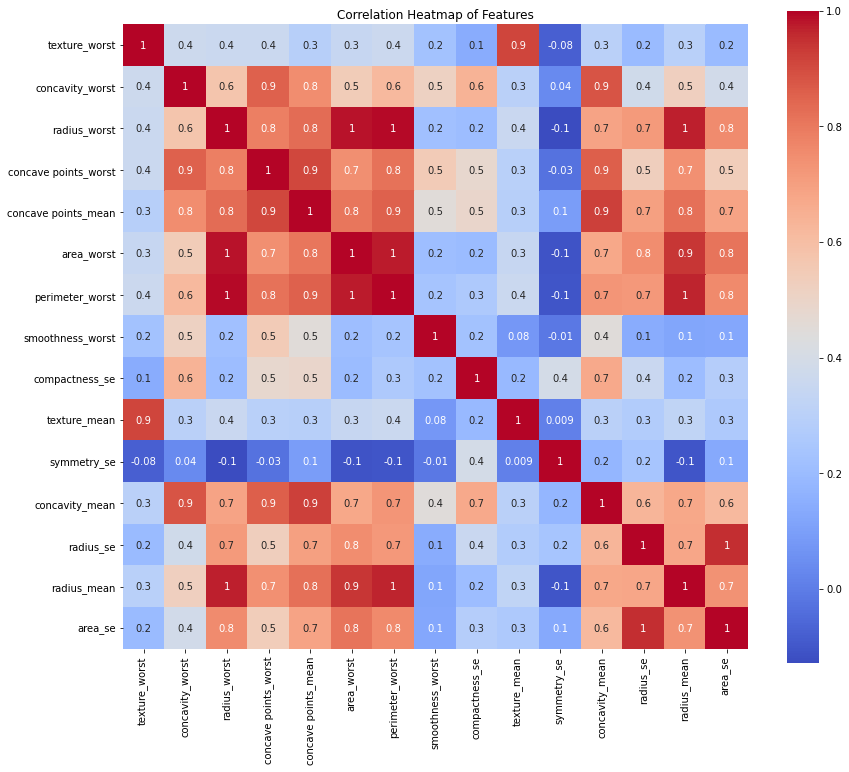

In [70]:
# Correlation heatmap to understand relationships between features
plt.figure(figsize=(14, 12))
sns.heatmap(df[Top_features].corr(), annot=True, square=True, cmap='coolwarm', fmt= '.0g')
plt.title('Correlation Heatmap of Features')
plt.show()

2. **Pair Plot of Selected Features**

The pair plot below shows the relationships between selected features (`mean_radius`, `mean_texture`, `mean_perimeter`, `mean_area`) and the target variable (`diagnosis`). This visualization helps to observe how different features differentiate benign and malignant tumors.

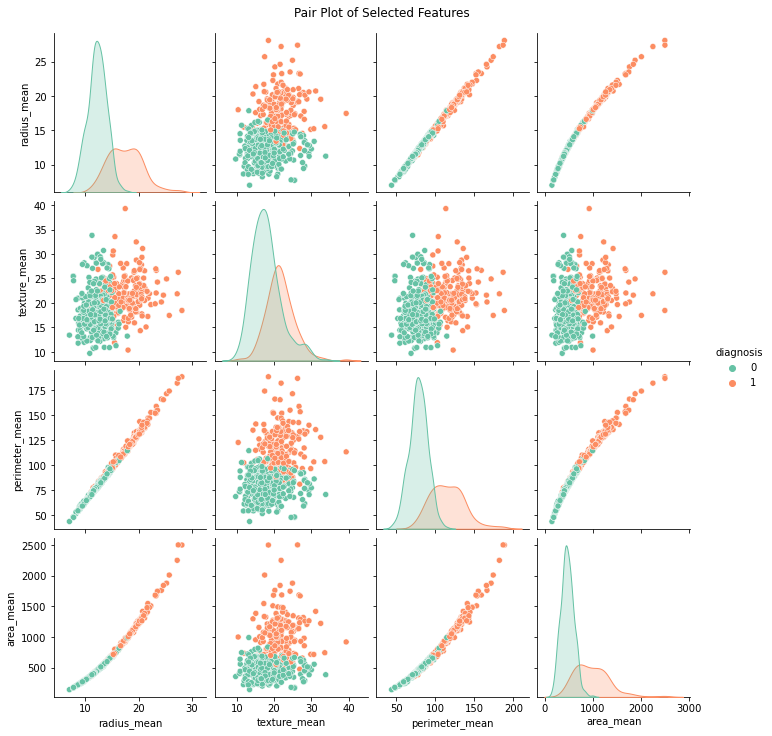

In [67]:
# Pair plot for selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', palette='Set2')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

3. **Distribution of Feature Values for Each Diagnosis**

The histogram below shows the distribution of `area_mean` for benign and malignant tumors. Such plots help identify whether certain features have distinct ranges for different classes, which can aid in classification.

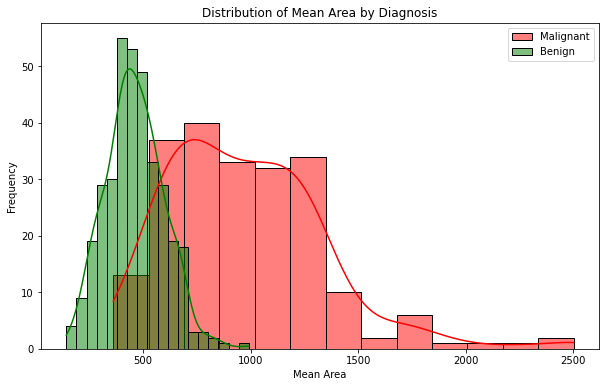

In [35]:
# Distribution of a selected feature based on diagnosis
plt.figure(figsize=(10, 6))
sns.histplot(df[df['diagnosis'] == 1]['area_mean'], color='red', label='Malignant', kde=True)
sns.histplot(df[df['diagnosis'] == 0]['area_mean'], color='green', label='Benign', kde=True)
plt.title('Distribution of Mean Area by Diagnosis')
plt.xlabel('Mean Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

4. **Box Plot of Feature Values by Diagnosis**

The box plot below compares the `radius_mean` of tumors for benign and malignant diagnoses. This type of plot is useful for understanding the spread and central tendency of feature values across different classes.

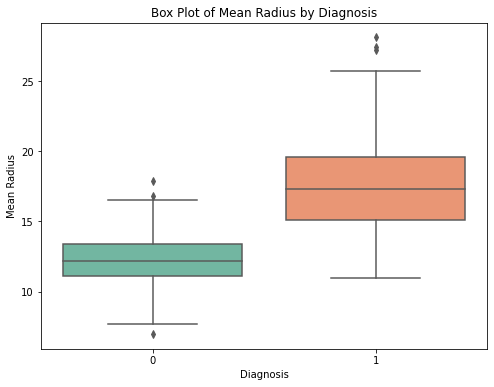

In [36]:
# Box plot for a selected feature based on diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set2')
plt.title('Box Plot of Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()

### **Summary**

The project successfully developed a reliable and interpretable model for breast cancer prediction, demonstrating the effectiveness of using machine learning techniques in healthcare applications. Implementing such models can significantly aid in early detection and treatment planning, ultimately contributing to better patient outcomes.